# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [205]:
import pandas as pd
import numpy as np
import requests
import tweepy as twp
import re
import json
from io import StringIO
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from PIL import Image
from io import BytesIO

# Ensure you have the stopwords corpus downloaded
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Fetch data from the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
  # Process the downloaded data
  # (Replace with your desired processing logic)
    data = response.text  # Data is likely text for a TSV file
    df_url = pd.read_csv(StringIO(data), sep='\t')
else:
    print(f"Error downloading data: {response.status_code}")
    
df_url.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
def read_json_lines(filename):
    """ Reads a JSON Lines file into a Pandas DataFrame.
    Args:
        filename: The path to the JSON Lines file.

    Returns:
        A Pandas DataFrame containing the data from the file.
    """

    with open(filename, 'r') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)

# Example usage
json_file = "tweet_json.txt"  # Replace with the actual path to your file
df_json_file = read_json_lines(json_file)
tweet_json_df = df_json_file[['id', 'retweet_count', 'favorite_count']]
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### From the visual inspection we can see some 'Nan' records where captured as 'None'

In [13]:
# Convert None to NaN
tweet_df = tweet_df.replace('None', value=np.nan)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [15]:
tweet_df.apply(lambda x: sum(x.isnull()))

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

##### Observations:
* There are missing data in name column which means 745 dog reviews have no name.
    
* The "timestamp" column is an object (strings in Python) rather than a datetime object.
    
* There are other columns with lots of missing records -  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper and puppo.

In [18]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Function to count stop words
def count_stopwords(text):
    if pd.isnull(text):
        return 0
    words = text.lower().split()
    return sum(1 for word in words if word in stop_words)

# Apply function to the column
counter = sum(tweet_df['name'].apply(count_stopwords))
print(f"There are {counter} stop words in the name column.")

There are 88 stop words in the name column.


In [20]:
tweet_df[tweet_df['name'].isin(stop_words)]['name'].value_counts()

name
a       55
the      8
an       7
very     5
just     4
not      2
such     1
my       1
his      1
this     1
all      1
by       1
Name: count, dtype: int64

##### A quick look from the above suggest that there are 55 and 7 cases respectively where a Dog's name is recorded as 'a' and 'an' which does not seems right. 

##### The above analysis further confirms that we have got a total of 88 stops words in the name column.

In [24]:
# instances where all columns are Missing
tweet_df[tweet_df['doggo'].isna() & tweet_df['floofer'].isna() & tweet_df['pupper'].isna() & tweet_df['puppo'].isna()].shape[0]

1976

##### From visual inspection, there seems to be some element of close association between doggo, floofer, pupper and puppo. 

In [26]:
# instances where all columns are not missing
non_missing = tweet_df[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]
non_missing = non_missing[~(non_missing['doggo'].isna() & non_missing['floofer'].isna() & non_missing['pupper'].isna() & non_missing['puppo'].isna())].reset_index(drop=True)
print(f"There are {len(non_missing)} records in this bucket.") 
non_missing.head()

There are 380 records in this bucket.


,tweet_id,doggo,floofer,pupper,puppo
0,890240255349198849,doggo,NaN,NaN,NaN
1,889665388333682689,NaN,NaN,NaN,puppo
2,889531135344209921,NaN,NaN,NaN,puppo
3,886366144734445568,NaN,NaN,pupper,NaN
4,884162670584377345,doggo,NaN,NaN,NaN


In [29]:
# Count non-NaN records in each column
non_nan_counts = non_missing.notna().sum().reset_index()
# Rename columns for clarity
non_nan_counts.columns = ['column', 'non_nan_count']
non_nan_counts

,column,non_nan_count
0,tweet_id,380
1,doggo,97
2,floofer,10
3,pupper,257
4,puppo,30


In [30]:
non_missing[non_missing['tweet_id'].
            isin([855851453814013952, 854010172552949760,
                  759793422261743616, 733109485275860992, 
                  751583847268179968 ])] \
            .loc[:, ['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,doggo,floofer,pupper,puppo
26,855851453814013952,doggo,NaN,NaN,puppo
28,854010172552949760,doggo,floofer,NaN,NaN
155,759793422261743616,doggo,NaN,pupper,NaN
169,751583847268179968,doggo,NaN,pupper,NaN
211,733109485275860992,doggo,NaN,pupper,NaN


#### Observations:
* From the above, there 380 entries where doggo, floofer, pupper and puppo are not missing; in that category: doggo is doggo where other instance are Nan, pupper is pupper where other instance are Nan etc.

* In 1976 cases there are no records for the Dog's classification.

* There are instances where a dog has got more than one type of classification. ex: 855851453814013952, 854010172552949760, 759793422261743616, 733109485275860992, 751583847268179968 

The expectation is to have 1 URL link per tweet_id in the expanded_urls column, but a visual inspection suggests this is not true for the data points in the dataset, and we need to investigate further.

In [35]:
# Function to split the text and count the number of splits
def count_splits(text):
    if pd.isnull(text):
        return 0
    #return len(text.split(','))
    return len(str(text).split(','))

expanded_urls_df = tweet_df[['tweet_id','expanded_urls', 'name']]
# Apply the function to the column
expanded_urls_df['split_count'] = expanded_urls_df['expanded_urls'].apply(count_splits)
expanded_urls_df[expanded_urls_df['split_count'] > 1].head()

,tweet_id,expanded_urls,name,split_count
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,Franklin,2
6,890971913173991426,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,2
7,890729181411237888,https://twitter.com/dog_rates/status/890729181...,NaN,2
10,890006608113172480,https://twitter.com/dog_rates/status/890006608...,Koda,2
13,889638837579907072,https://twitter.com/dog_rates/status/889638837...,Ted,2


In [37]:
print(expanded_urls_df[expanded_urls_df['tweet_id'] == 668623201287675904]['expanded_urls'].iloc[0])

https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1


In [39]:
# Define a function to split the column and return the last item 
def extract_18_digits(input_string): 
    # Check if the input is a string 
    if isinstance(input_string, str): 
        # Regular expression to match an 18-digit number 
        match = re.search(r'\b\d{18}\b', input_string) 
        if match: 
            return match.group(0) 
    return None
    
# Apply the function to the DataFrame 
expanded_urls_df['tweet_id_x'] = expanded_urls_df['expanded_urls'].apply(extract_18_digits)
expanded_urls_df['tweet_id'] = expanded_urls_df['tweet_id'].astype(str)
expanded_urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2356 non-null   object
 1   expanded_urls  2297 non-null   object
 2   name           1611 non-null   object
 3   split_count    2356 non-null   int64 
 4   tweet_id_x     2190 non-null   object
dtypes: int64(1), object(4)
memory usage: 92.2+ KB


In [41]:
# Define a function to determine matches 
def check_match(row): 
    return 1 if row['tweet_id'] == row['tweet_id_x'] else 0 

# Apply the function to the DataFrame 
expanded_urls_df['matches'] = expanded_urls_df.apply(check_match, axis=1)
expanded_urls_df.head()

,tweet_id,expanded_urls,name,split_count,tweet_id_x,matches
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,Phineas,1,892420643555336193,1
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,Tilly,1,892177421306343426,1
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,Archie,1,891815181378084864,1
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,Darla,1,891689557279858688,1
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,Franklin,2,891327558926688256,1


In [43]:
expanded_urls_df.matches.value_counts()

matches
1    1994
0     362
Name: count, dtype: int64

##### Observations:
* It is obvious from the above that the expanded_urls column has got lots of duplicates.
* There are 362 observations where the tweet_id differs from what was provided in the expanded_urls.

In [46]:
# Compile the regex pattern once
regex_pattern = re.compile(r'(\d+\.\d+)/(\d+)')

# List to store results
results = []

# Iterate over rows in 'text' column
for index, row in tweet_df.iterrows():
    result = regex_pattern.search(row['text'])
    if result:
        result = {
            'Row_Index': int(index),
            'Text_String': row['text'],
            'Numerator': row['rating_numerator']
        }
        results.append(result)
        
# Write results to a JSON file
with open('results.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Results have been written to 'results.json'")

Results have been written to 'results.json'


In [48]:
# Read the JSON file
with open('results.json', 'r') as f:
    outcome = json.load(f)

outcome

[{'Row_Index': 45,
  'Text_String': 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
  'Numerator': 5},
 {'Row_Index': 340,
  'Text_String': "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
  'Numerator': 75},
 {'Row_Index': 695,
  'Text_String': "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
  'Numerator': 75},
 {'Row_Index': 763,
  'Text_String': "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
  'Numerator': 27},
 {'Row_Index': 1689,
  'Text_String': "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
  'Numerator': 5},
 {'Row_Index': 1712,
  'Te

##### Observations:

* It can be observed from the above that there are 6 cases of where the rating_numerator does not match that was provided in the text. For example, for observation at index 45, 13.5 was the provided rating but 5 was given. 

The expectation is to have a rating_denominator of 10 for all the data points.

In [52]:
# Count entries not equal to '10' - There are 23 entries that are There are 23 entries that are 
not_10_rating = tweet_df[tweet_df['rating_denominator'] != 10].shape[0]

print(f"There are {not_10_rating} instances where the rating_denominator is not 10")

There are 23 instances where the rating_denominator is not 10


##### Observations:
* As we can see from the above that not all of the entries in the rating_denominator column equals 10.

In [55]:
df_url.apply(lambda x: sum(x.isnull()))

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [57]:
df_url.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Observations:

* By visual inspection, it can be observed that the prediction fields (p1, p2 and p3) are inconsistent.
* There are instances where the provided images are predicted to be non-dog (p1_dog, p2_dog, p3_dog)
* img_num field is not needed

In [60]:
jpg_url_df = df_url[['tweet_id', 'jpg_url']]
img_counts = jpg_url_df.jpg_url.value_counts()
# Filter for names where the count is greater than 1
images_with_more_than_one_entry = img_counts[img_counts > 1].index

# Create a new column 'more_than_1' to indicate rows with jpg_urls appearing more than once 
jpg_url_df['more_than_1'] = jpg_url_df['jpg_url'].isin(images_with_more_than_one_entry)
jpg_url_df[jpg_url_df['more_than_1'] == True].head()

,tweet_id,jpg_url,more_than_1
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,True


In [62]:
jpg_url_df['more_than_1'].value_counts()

more_than_1
False    1943
True      132
Name: count, dtype: int64

In [64]:
# if the jpg_url matches the id
jpg_url_df[jpg_url_df['jpg_url'] == 'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg']

,tweet_id,jpg_url,more_than_1
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,True


In [66]:
expanded_urls_df[expanded_urls_df['tweet_id'] == '670319130621435904']

,tweet_id,expanded_urls,name,split_count,tweet_id_x,matches
2127,670319130621435904,https://twitter.com/dog_rates/status/670319130...,NaN,1,670319130621435904,1


In [68]:
expanded_urls_df[expanded_urls_df['tweet_id'] == '759159934323924993']

,tweet_id,expanded_urls,name,split_count,tweet_id_x,matches
895,759159934323924993,https://twitter.com/dog_rates/status/670319130...,NaN,2,670319130621435904,0


##### Observations:

* From the above we can see cases where one `jpg_url` is linked to more than one `tweet_id`. example `https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg` is linked to both `667509364010450944` and `798628517273620480`.
* A quick review of the observation suggests that all entries in the other fields are the same except the `tweet_id`.
* A closer look at the `expanded_urls` reveals that the record belongs to `667509364010450944` as there is a match with the `tweet_id`.

In [71]:
tweet_json_df.apply(lambda x: sum(x.isnull()))

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [73]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. Missing data in the `name's` column - 745 dog reviews have no name

2. 55 dog `names` are labelled as 'a' with a total of 88 with stop words.

3. There are 1976 entries where `doggo`, `floofer`, `pupper` and `puppo` are all missing.

4. The 380 entries where `doggo`, `floofer`, `pupper` and `puppo` are not missing; in that instance, `doggo` is `doggo` where other columns are `None`. There are also about 14 cases where a dog is classified into more than one class.

5. The `expanded_urls` column has lots of duplicates.
6. The `expanded_urls` column has 362 instances where the provided urls are either duplicates, missing or url is not a Twitter link.

7. Missing values in the following columns — `doggo`, `floofer`, `pupper` and `puppo` — were captured as `None` instead of Nan. This makes it difficult for pandas to capture them as missing values but rather as strings.

8. The `rating_numerator` differs from what was given in the `text` in 5 instances.

9. 23 entries in the `rating_denominator` column are not equal to 10.

10. There are cases where one `jpg_url` is linked to more than one `tweet_id`.

### Tidiness issues
1. The `tweet_id` is returned as an integer(INT) object rather than an object (strings in Python) as the column is just a label(identifier).

2. For instances where `doggo`, `floofer`, `pupper` and `puppo` are not missing; `doggo` is `doggo` where other columns are Nan and same for other class. This should be collapsed into a column rather than 4.

3. Drop unwanted columns from tweet_df - `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id`.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [243]:
# Make copies of original pieces of data
cleaned_tweet_df=tweet_df.copy()
cleaned_df_url=df_url.copy()
cleaned_tweet_json_df=tweet_json_df.copy()

### Issue #1: 
The "expanded_urls" column is has lots of duplicates

#### Define:
To remove the duplicated urls from the url column

#### Code

In [248]:
def remove_duplicated_urls(text):
    if pd.isnull(text):
        return 0
    return text.split(',')[0]

# Apply the function to the column
cleaned_tweet_df['expanded_urls'] = cleaned_tweet_df['expanded_urls'].apply(remove_duplicated_urls)

#### Test

In [251]:
# Apply the function to the column
cleaned_tweet_df['split_count_'] = cleaned_tweet_df['expanded_urls'].apply(count_splits)

# Count the number of rows where the length of the split is more than 1
count_more_than_one = cleaned_tweet_df[cleaned_tweet_df['split_count_'] > 1].shape[0]

print(f"Number of rows where the length of the split is more than 1: {count_more_than_one}")

Number of rows where the length of the split is more than 1: 0


### Issue #2: 
The `expanded_urls` column has 362 instances where the provided urls are either duplicates, missing or url is not a Twitter link.

#### Define
To remove observations where the provided urls in the `expanded_urls` are missing or url is not a Twitter link.

#### Code

In [255]:
# Apply the function to the DataFrame 
cleaned_tweet_df['tweet_id_x'] = cleaned_tweet_df['expanded_urls'].apply(extract_18_digits)
cleaned_tweet_df['tweet_id'] = cleaned_tweet_df['tweet_id'].astype(str)
cleaned_tweet_df['matches'] = cleaned_tweet_df.apply(check_match, axis=1)
cleaned_tweet_df = cleaned_tweet_df[cleaned_tweet_df['matches']==1]

#### Test

In [257]:
cleaned_tweet_df.matches.value_counts()

matches
1    1966
Name: count, dtype: int64

### Issue #3: 
For instances where `doggo`, `floofer`, `pupper` and `puppo` are not missing; `doggo` is `doggo` where other columns are Nan and same for other class. This should be collapsed into a column rather than 4.

#### Define
To collapse the 4 columns into a dog_stage

#### Code

In [261]:
def dog_stage_classification(row):
    # Defining a list to store the data
    dog_lst = [i for i in ['doggo', 'floofer', 'pupper', 'puppo'] if row[i] == i]
    
    # Setting the stage
    row['dog_stage'] = np.NaN if len(dog_lst) == 0 else ' and '.join(dog_lst)
    
    return row

# Applying the "dog_class" function to each record
cleaned_tweet_df = cleaned_tweet_df.apply(dog_stage_classification, axis=1)
cleaned_tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,split_count_,tweet_id_x,matches,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,NaN,NaN,NaN,NaN,1,892420643555336193,1,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,NaN,NaN,NaN,NaN,1,892177421306343426,1,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,NaN,NaN,NaN,NaN,1,891815181378084864,1,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,NaN,NaN,NaN,NaN,1,891689557279858688,1,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,NaN,NaN,NaN,NaN,1,891327558926688256,1,NaN


#### Test

In [266]:
cleaned_tweet_df.dog_stage.value_counts()

dog_stage
pupper               202
doggo                 60
puppo                 20
doggo and pupper       9
floofer                7
doggo and puppo        1
doggo and floofer      1
Name: count, dtype: int64

### Issue #4: 
There are 5 instances where the rating_numerator differs from what was given in the text.

#### Define
Extract the rating_numerator where what was given was different from what is in the text.

#### Code

In [270]:
regex_pattern = re.compile(r'(\d+\.\d+|\d+)/(\d+)')

# Function to extract the number before the division sign
def extract_number_before_division(text):
    result = regex_pattern.search(text)
    if result:
        number = result.group(1)
        # Return as float if there's a decimal point, otherwise as integer
        return float(number) if '.' in number else int(number)
    return None

cleaned_tweet_df['rating_numerator'] = cleaned_tweet_df['text'].apply(extract_number_before_division)

In [271]:
# List to store results
results = []

regex_pattern_ = re.compile(r'(\d+\.\d+)/(\d+)')

# Iterate over rows in 'text' column
for index, row in cleaned_tweet_df.iterrows():
    result = regex_pattern_.search(row['text'])
    if result:
        result = {
            'Row_Index': int(index),
            'Text_String': row['text'],
            'Numerator': row['rating_numerator']
        }
        results.append(result)
        
results

[{'Row_Index': 45,
  'Text_String': 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
  'Numerator': 13.5},
 {'Row_Index': 695,
  'Text_String': "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
  'Numerator': 9.75},
 {'Row_Index': 763,
  'Text_String': "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
  'Numerator': 11.27},
 {'Row_Index': 1712,
  'Text_String': 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
  'Numerator': 11.26}]

#### Test

In [273]:
cleaned_tweet_df.iloc[340]['rating_numerator']

11.0

#### Other Cleaning Tasks

In [275]:
# Making the changes
cleaned_tweet_df['timestamp'] = pd.to_datetime(cleaned_tweet_df['timestamp'])

# Assigning 10 rating_denominator
cleaned_tweet_df['rating_denominator'] = 10

# Making the change in data-type
cleaned_tweet_df['tweet_id'] = cleaned_tweet_df['tweet_id'].astype(str)

# Removing stop words from the name
cleaned_tweet_df = cleaned_tweet_df[~cleaned_tweet_df['name'].isin(stop_words)]

# Converting into lower case
cleaned_tweet_df['name'] = cleaned_tweet_df['name'].str.lower()

# drop missing names 
#cleaned_tweet_df = cleaned_tweet_df[~cleaned_tweet_df['name'].isnull()]

# Dropping the unwanted columns
cleaned_tweet_df = cleaned_tweet_df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                       'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 
                       'pupper', 'puppo', 'split_count_', 'tweet_id_x', 'matches'])

# Verifying the changes
cleaned_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1884 non-null   object             
 1   timestamp           1884 non-null   datetime64[ns, UTC]
 2   source              1884 non-null   object             
 3   text                1884 non-null   object             
 4   expanded_urls       1884 non-null   object             
 5   rating_numerator    1884 non-null   float64            
 6   rating_denominator  1884 non-null   int64              
 7   name                1344 non-null   object             
 8   dog_stage           290 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 147.2+ KB


In [276]:
# filter out predicted non-dog tweets
cleaned_df_url = cleaned_df_url[(cleaned_df_url['p1_dog'] == True) | (cleaned_df_url['p2_dog'] == True) | (cleaned_df_url['p3_dog'] == True)]
cleaned_df_url.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [278]:
# Define a function to determine the new column value
def determine_prediction(row):
    predictions = []
    if row['p1_dog']:
        predictions.append(('p1', row['p1'], row['p1_conf']))
    if row['p2_dog']:
        predictions.append(('p2', row['p2'], row['p2_conf']))
    if row['p3_dog']:
        predictions.append(('p3', row['p3'], row['p3_conf']))

    # If no model made a correct prediction, return None
    if not predictions:
        return None, None
    
    # Sort predictions by confidence level in descending order
    predictions.sort(key=lambda x: x[2], reverse=True)
    
    # Return the prediction with the highest confidence
    return predictions[0][1], predictions[0][2]

In [279]:
# Apply the function to each row in the DataFrame
cleaned_df_url['pred_dog_type'], cleaned_df_url['pred_conf'] = zip(*cleaned_df_url.apply(determine_prediction, axis=1))
cleaned_df_url = cleaned_df_url[['tweet_id','jpg_url', 'pred_dog_type',	'pred_conf']]
cleaned_df_url.head()

,tweet_id,jpg_url,pred_dog_type,pred_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [281]:
# Making the change in data-type
cleaned_df_url['tweet_id'] = cleaned_df_url['tweet_id'].astype(str)
cleaned_tweet_json_df['id'] = cleaned_tweet_json_df['id'].astype(str)

In [285]:
cleaned_tweet_df_ = cleaned_tweet_df.merge(cleaned_tweet_json_df, left_on='tweet_id', right_on='id', how='inner')
cleaned_tweet_dft = cleaned_tweet_df_.merge(cleaned_df_url, left_on='tweet_id', right_on='tweet_id', how='inner')
cleaned_tweet_dft = cleaned_tweet_dft.drop(columns=['id'])
cleaned_tweet_dft['rating'] = round(cleaned_tweet_dft.rating_numerator/cleaned_tweet_dft.rating_denominator, 1)
cleaned_tweet_dft.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,pred_dog_type,pred_conf,rating
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,1.3
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,1.2
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,1.3
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,1.2
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,1.3


In [289]:
cleaned_tweet_dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1594 non-null   object             
 1   timestamp           1594 non-null   datetime64[ns, UTC]
 2   source              1594 non-null   object             
 3   text                1594 non-null   object             
 4   expanded_urls       1594 non-null   object             
 5   rating_numerator    1594 non-null   float64            
 6   rating_denominator  1594 non-null   int64              
 7   name                1179 non-null   object             
 8   dog_stage           245 non-null    object             
 9   retweet_count       1594 non-null   int64              
 10  favorite_count      1594 non-null   int64              
 11  jpg_url             1594 non-null   object             
 12  pred_dog_type       1594 non-null 

In [294]:
def remove_outliers(df, columns):
    """
    Remove outliers from a list of DataFrame columns using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): A list of column names from which to remove outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed from the specified columns.
    """
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [296]:
cleaned_tweet_dft[['rating']].describe()

,rating
count,1594.000000
mean,1.143852
std,0.804782
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,16.500000


In [298]:
columns = ['rating_numerator', 'rating_denominator', 'rating', 'retweet_count', 'favorite_count']
cleaned_tweet_dft = remove_outliers(cleaned_tweet_dft, columns)
cleaned_tweet_dft[['rating_numerator', 'rating_denominator', 'rating', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,rating_denominator,rating,retweet_count,favorite_count
count,1315.000000,1315.0,1315.000000,1315.000000,1315.000000
mean,10.877779,10.0,1.087757,1733.322433,5912.926996
std,1.308577,0.0,0.130835,1490.477395,5293.662469
min,8.000000,10.0,0.800000,16.000000,81.000000
25%,10.000000,10.0,1.000000,612.500000,2058.000000
50%,11.000000,10.0,1.100000,1257.000000,3831.000000
75%,12.000000,10.0,1.200000,2485.000000,8730.500000
max,14.000000,10.0,1.400000,7612.000000,22133.000000


In [300]:
cleaned_tweet_dft.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'pred_dog_type',
       'pred_conf', 'rating'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [303]:
cleaned_tweet_dft.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [306]:
twitter_df = pd.read_csv("twitter_archive_master.csv")
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(str)
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,pred_dog_type,pred_conf,rating
0,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,1.3
1,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10,stuart,puppo,2321,15359,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,1.3
2,888554962724278272,2017-07-22 00:23:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13.0,10,ralphus,NaN,3732,20290,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,Siberian_husky,0.700377,1.3
3,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10,roscoe,pupper,3316,21524,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,French_bulldog,0.999201,1.2
4,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,yogi,doggo,3128,20771,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,1.2


In [307]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1315 non-null   object 
 1   timestamp           1315 non-null   object 
 2   source              1315 non-null   object 
 3   text                1315 non-null   object 
 4   expanded_urls       1315 non-null   object 
 5   rating_numerator    1315 non-null   float64
 6   rating_denominator  1315 non-null   int64  
 7   name                985 non-null    object 
 8   dog_stage           207 non-null    object 
 9   retweet_count       1315 non-null   int64  
 10  favorite_count      1315 non-null   int64  
 11  jpg_url             1315 non-null   object 
 12  pred_dog_type       1315 non-null   object 
 13  pred_conf           1315 non-null   float64
 14  rating              1315 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 154.2+

In [310]:
twitter_df[['rating', 'retweet_count', 'favorite_count']].describe()

,rating,retweet_count,favorite_count
count,1315.000000,1315.000000,1315.000000
mean,1.087757,1733.322433,5912.926996
std,0.130835,1490.477395,5293.662469
min,0.800000,16.000000,81.000000
25%,1.000000,612.500000,2058.000000
50%,1.100000,1257.000000,3831.000000
75%,1.200000,2485.000000,8730.500000
max,1.400000,7612.000000,22133.000000


#### Insight 1
How spread are the retweet_count and favorite_count over the months?

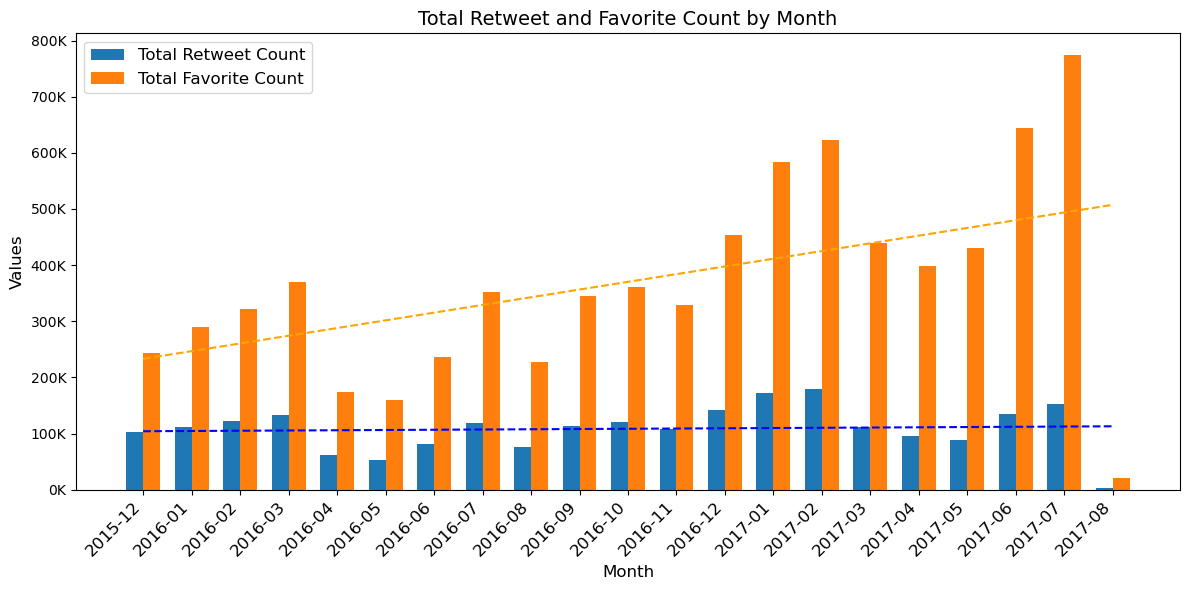

In [313]:
# Create a new column for the month in yyyy-mm format
twitter_df['month'] = twitter_df_['timestamp'].str[:7]

# Group by month and calculate total_sales and sales_count
mth_df = twitter_df.groupby('month').agg({
    'retweet_count': 'sum',
    'favorite_count': 'sum'
}).reset_index()

mth_df.columns = ['month', 'retweet_count_sum', 'favorite_count_sum']

# Plotting the data
x = np.arange(len(mth_df['month']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size to reduce label condensation
bars1 = ax.bar(x - width/2, mth_df['retweet_count_sum'], width, label='Total Retweet Count')
bars2 = ax.bar(x + width/2, mth_df['favorite_count_sum'], width, label='Total Favorite Count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Total Retweet and Favorite Count by Month', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(mth_df['month'], fontsize=12, rotation=45, ha='right')  # Rotate labels for better spacing
ax.legend(fontsize=12)

# Remove the data labels on the bars for clarity
def remove_labels(bars):
    for bar in bars:
        bar.set_label('')

remove_labels(bars1)
remove_labels(bars2)

# Format y-axis to show values in thousands 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x*1e-3)))

# Adding trend lines 
# Trend line for total retweet count 
z1 = np.polyfit(x, mth_df['retweet_count_sum'], 1) 
p1 = np.poly1d(z1) 
ax.plot(x, p1(x), linestyle='--', color='blue', label='Retweet CountTrend') 

# Trend line for tweet count 
z2 = np.polyfit(x, mth_df['favorite_count_sum'], 1) 
p2 = np.poly1d(z2) 
ax.plot(x, p2(x), linestyle='--', color='orange', label='Favorite Count Trend')

fig.tight_layout()

# Show the plot
plt.show()

#### Observation.
* We can observe from the above that there is no correlation between Favourite and Retweet count. This means that while the total retweet count remained fairly flat across the months, the total favourite count increased with time.

#### Insight 2
Which tweet_id and Image has the highest favorite_count and retweet_count?

In [317]:
twitter_df.loc[[twitter_df['favorite_count'].idxmax()]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,pred_dog_type,pred_conf,rating,month
80,833124694597443584,2017-02-19 01:23:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,https://twitter.com/dog_rates/status/833124694...,12.0,10,gidget,pupper,5513,22133,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,Cardigan,0.710523,1.2,2017-06


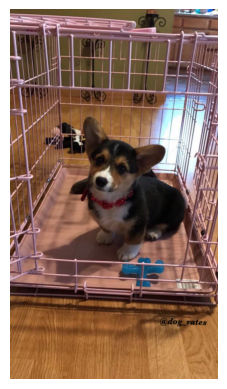

In [319]:
# URL of the image
url = twitter_df.loc[twitter_df['favorite_count'].idxmax(), 'jpg_url']

# Fetch the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [321]:
twitter_df.loc[[twitter_df['retweet_count'].idxmax()]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,pred_dog_type,pred_conf,rating,month
362,762471784394268675,2016-08-08 02:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Glenn. Being in public scares him. Fright...,https://twitter.com/dog_rates/status/762471784...,12.0,10,glenn,NaN,7612,12571,https://pbs.twimg.com/ext_tw_video_thumb/76247...,Samoyed,0.540276,1.2,2016-11


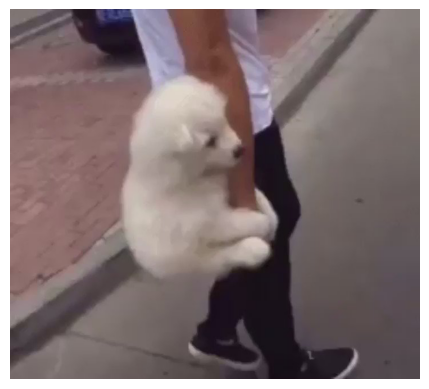

In [323]:
# URL of the image
url = twitter_df.loc[twitter_df['retweet_count'].idxmax(), 'jpg_url']

# Fetch the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

#### Insight 3
Which dog is the most rated and with the highest total retweet_count?

In [326]:
#twitter_df.name.value_counts()
twitter_df.groupby('rating')[['retweet_count', 'favorite_count']].sum().reset_index()

,rating,retweet_count,favorite_count
0,0.8,51347,145853
1,0.9,104306,310848
2,1.0,426023,1232268
3,1.1,553433,1831824
4,1.2,773577,2800037
5,1.3,342067,1338212
6,1.4,28566,116457


In [328]:
grpd_df = twitter_df.groupby('name').agg({
    'rating': ['count', 'mean'],
    'retweet_count': 'sum'
}).reset_index()

# Flatten the MultiIndex columns
grpd_df.columns = ['name', 'total_rating_count', 'average_ratings', 'total_retweet_count']

# Sort the grouped DataFrame in descending order based on total_ratings_count
sorted_df = grpd_df.sort_values(by='total_rating_count', ascending=False)

# Return the top 10 records
top_10_df = sorted_df.head(10)

top_10_df

,name,total_rating_count,average_ratings,total_retweet_count
131,charlie,10,1.170000,27317
158,cooper,9,1.122222,16561
697,tucker,9,1.200000,19583
422,lucy,7,1.100000,10049
495,oliver,7,1.085714,10038
585,sadie,6,1.000000,5835
516,penny,6,1.066667,17478
722,winston,6,1.033333,9993
173,daisy,6,1.200000,10722
683,toby,5,1.100000,11445


#### Observation.
* `Charlie` is the most rated dog with `10` count of ratings and an average rating of `1.17` and total retweet_count of `27,317`

### Insights:
1. `Charlie` is the most-rated dog with `10` count of ratings, an average rating of `1.17` and a total retweet_count of `27,317`.

2. `Samoyed` with is the dog with highest What is the rating ratio based on Retweets and Favourite Analysis?

3. Rating Retweet by Favourite Analysis

4. Which class of dogs has the highest ratings?
5. Which dog is rated the highest?

### Visualization

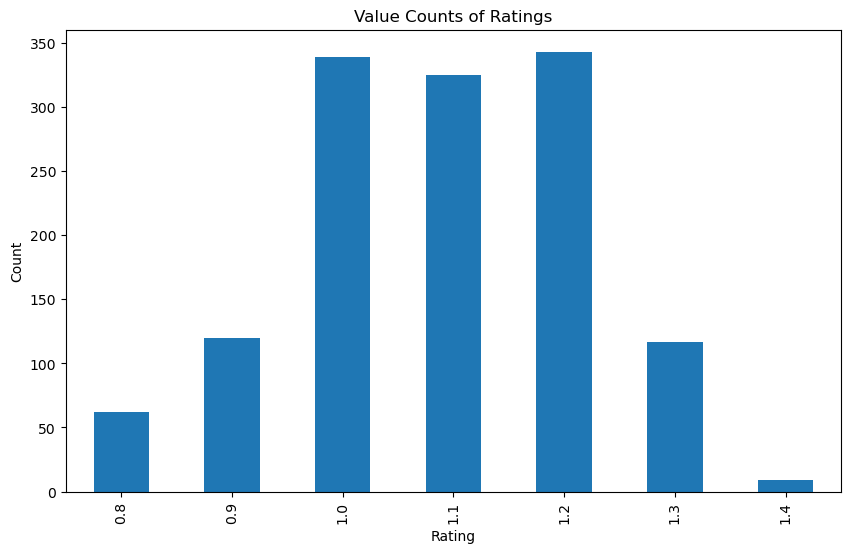

In [348]:
# Assuming twitter_df is your DataFrame
rating_counts = twitter_df['rating'].value_counts().sort_index()
# Plot the value counts
rating_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Value Counts of Ratings')
plt.show()

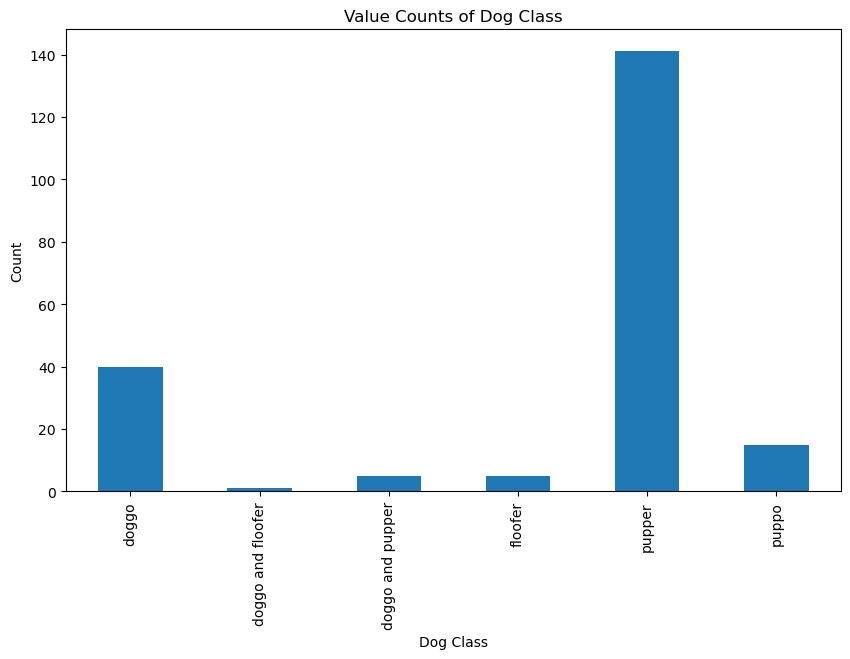

In [350]:
# Assuming twitter_df is your DataFrame
dog_class_counts = twitter_df['dog_stage'].value_counts().sort_index()

# Plot the value counts
dog_class_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Dog Class')
plt.ylabel('Count')
plt.title('Value Counts of Dog Class')
plt.show()

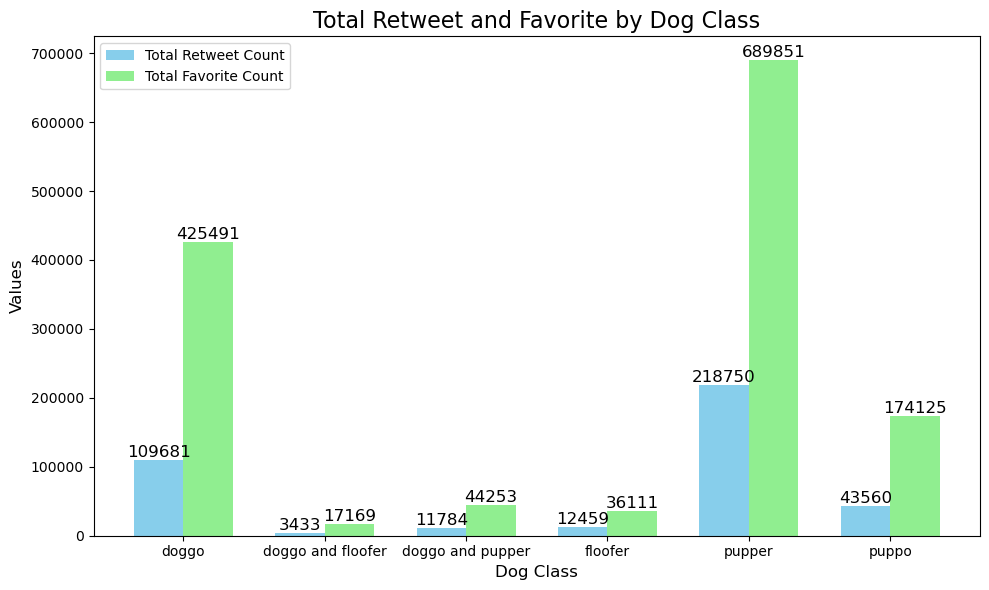

In [338]:
# Group by 'sex' and sum 'total_purchases' and 'total_sales'
grouped = twitter_df.groupby('dog_stage')[['retweet_count', 'favorite_count']].sum()

# Set up positions for bars and width
categories = grouped.index
retweet_count = grouped['retweet_count']
favorite_count = grouped['favorite_count']
width = 0.35  # bar width

# Set the positions of the bars (side by side)
x = np.arange(len(categories))  # the label locations
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
bar1 = ax.bar(x - width / 2, retweet_count, width, label='Total Retweet Count', color='skyblue')
bar2 = ax.bar(x + width / 2, favorite_count, width, label='Total Favorite Count', color='lightgreen')

# Labeling the chart
ax.set_title('Total Retweet and Favorite by Dog Stage', fontsize=16)
ax.set_xlabel('Dog Stage', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding values on top of the bars
def add_labels(bars):
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, 
                str(int(bar.get_height())), ha='center', va='bottom', fontsize=12)

add_labels(bar1)
add_labels(bar2)

# Show the plot
plt.tight_layout()
plt.show()

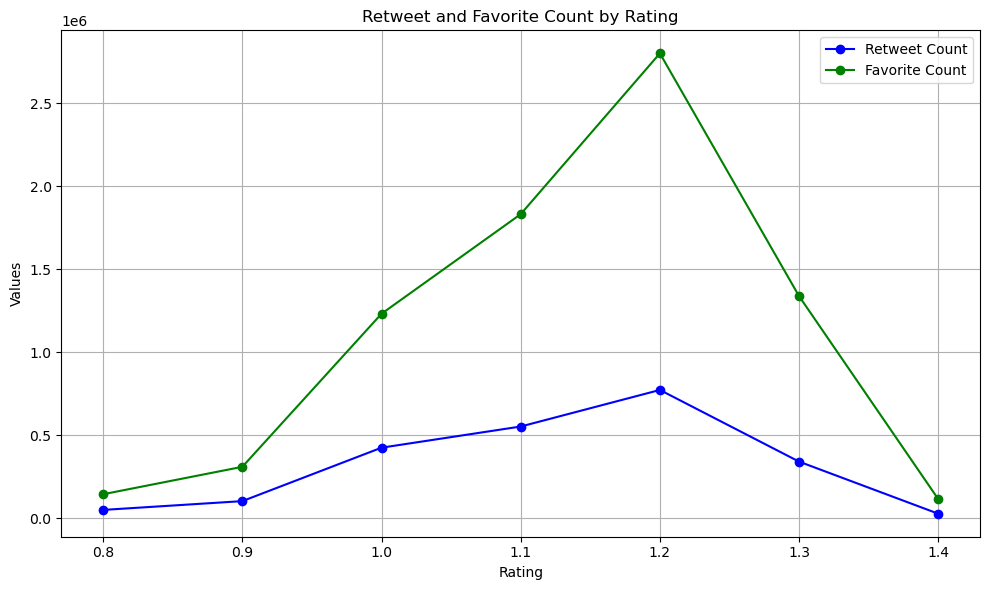

In [340]:
grouped_ = twitter_df.groupby('rating')[['retweet_count', 'favorite_count']].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(grouped_['rating'], grouped_['retweet_count'], marker='o', linestyle='-', color='b', label='Retweet Count')

# Plot total_sales
plt.plot(grouped_['rating'], grouped_['favorite_count'], label='Favorite Count', color='green', marker='o')
plt.xlabel('Rating')
plt.ylabel('Values')
plt.title('Retweet and Favorite Count by Rating')
plt.legend()
plt.grid(True)
plt.xticks(grouped_['rating'])  # To ensure all customer IDs are shown on x-axis
plt.tight_layout()

plt.show()

In [346]:
##tweet_df_ = cleaned_tweet_df.expanded_urls.str.extract('(\d{18})')